#### Deep Learning

+ A model processes data and learns to predict labels 
+ Use multiple models such as a feedforward NN
+ Introduce Transformer model
+ Loss is plotted for model classification on dummy data


#### Imports

In [1]:
import numpy as np   
import os              
import sys
import tensorflow as tf
import matplotlib.pyplot as plt

from functions import display_helper
from functions import dummy_data

from models.Transformer import TransformerModel
from models.DNN import NN, DNN

#### Initialise and Compile Models

+ Fully connected feedforward Neural Network (NN) 
+ Transformer model (https://github.com/SuperBruceJia/EEG-DL/blob/master/Models/main-Transformer.py)


In [2]:
simpleModel = NN()
transformerModel = TransformerModel()

simpleModel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss=tf.keras.losses.BinaryCrossentropy())
transformerModel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.Recall()])

#### Training loop:

In [3]:
model = transformerModel      # simpleModel , transformerModel

X, Y = dummy_data.create_labeled_dataset(1000, ["planck", "constant"])

history = model.fit(np.array(X), Y, validation_split=0.33, 
                epochs=20, batch_size=50, verbose=0)

#### Plot Loss 
(Test loss is lower since it has no dropout)

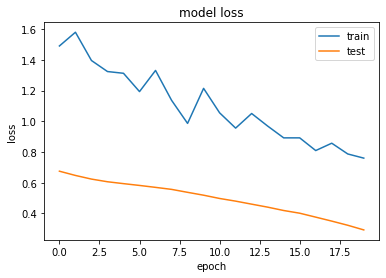

In [7]:
display_helper.show_plot(range(len(history.history['loss'])), [history.history['loss'], history.history['val_loss']],
                         "model loss", "epoch", "loss", ['train', 'test'])

TODO:
+ Show the confidence of a prediction (with softmax probability between 0 and 1) 
+ Compare multiple models on dummy data (DNN, CNN, RNN, Transformer(Encoder))